# Market Microstructure Project

Ivanna Herrera Ibarra 744614

09/09/25

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Price distribution

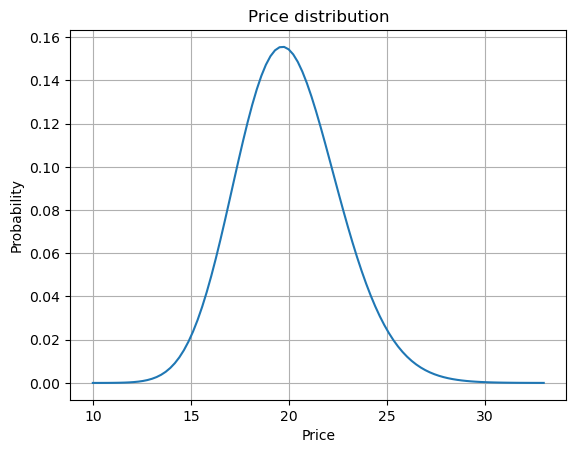

In [2]:
k = 60
lam = 3
s = np.linspace(10, 33, 100)
pdf = (lam**k * s**(k-1) * np.exp(-lam * s)) / math.factorial(k-1)

plt.plot(s, pdf)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Probability')
plt.grid()
plt.show()

## Expected revenue

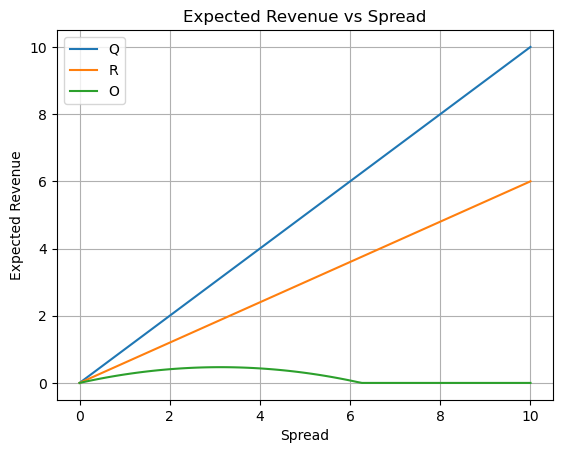

In [10]:
spread = np.linspace(0, 10, 100)
pi_l = 0.6
pi_bl = np.maximum(0.5 - 0.08 * spread, 0)


plt.plot(spread, spread, label='Q')
plt.plot(spread, spread * pi_l, label='R')
plt.plot(spread, spread * pi_l * pi_bl, label='O')
plt.title('Expected Revenue vs Spread')
plt.xlabel('Spread')
plt.ylabel('Expected Revenue')
plt.grid()
plt.legend()
plt.show()

## Optimal bid/ask